# HEART DISEASE PREDICTION MODEL TRAINING AND DEPLOYMENT

Heart Disease refers to any problem affecting the heart or a condition affecting the cardiovascular system- such as coronary artery disease, arrhythmia and heart failure. 
There are symptoms which indicate a heart problem which include but not limited to:
. Difficulty Breathing                    . High blood pressure
. Fatigue                                 . Age
. Chest pain/Angina                       . High stress/anxiety levels
. Diabetes                                . High cholosterol

## PROJECT GOAL

The aim of this project is to predict heart disease based on patient data (UCI Heart Disease Dataset- from Kaggle). The columns in the raw dataset:

1. id:	Identifier for each patient (just a number, no real medical meaning)
2. age:	Age of the patient
3. sex:	Gender of the patient (e.g., 'M' or 'F')
4. dataset:	Where dataset it came from 
5. cp:	Chest pain type (e.g., typical angina, atypical, non-anginal, asymptomatic)
6. trestbps: Resting blood pressure (in mm Hg)
7. chol: Serum cholesterol level (mg/dl)
8. fbs:	Fasting blood sugar >120 mg/dl (true/false or yes/no)
9. restecg:	Resting electrocardiographic results (e.g., normal, abnormal)
10. thalch:	Maximum heart rate achieved
11. exang:	Exercise-induced angina (yes or no)
12. oldpeak: ST depression induced by exercise relative to rest
13. slope:	Slope of the peak exercise ST segment (upsloping, flat, downsloping)
14. ca:	Number of major vessels colored by fluoroscopy (0–3)
15. thal: Thalassemia type (e.g., normal, fixed defect, reversible defect)
16. num: Target variable (presence of heart disease)

## IMPORTING LIBRARIES NEEDED

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) #to handle warnings
import matplotlib.pyplot as plt #for visualization
import numpy as np #for calculations
import pandas as pd #for data manipulation
import seaborn as sns #for further visualization
#for model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,  precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import shap
import joblib

## GETTING THE DATA

In [2]:
df= pd.read_csv('./heart_disease_uci.csv')  #data impored using the pandas' read_csv function

## DATA EXPLORATION (EDA)

This section will focus on exploring the characteristic of every column/ data point in the dataset. 

In [3]:
#to understand the data, let's observe the first five rows of the dataset
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
#using the info function to gain insight into the 'structure' and 'content' of the dataset
#It presents number of rows, column names, data types of each column and count of non-null values
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
#calling the describe function to give statistical information about dataset(numerical columns only)
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [6]:
#to obtain unique values of dataset
df['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

What can be observed from the information calling these functions, provided?
1. There are null values existing in some columns; some significant, some minimal.
2. There is a mix of numeric and categorical data type in the dataset.
3. The mean of the numerical columns is similar in value to the median suggesting a well distributed data (an information we still have to confirm).
4. Data is balnced(0: 411, 1-4: 509)

## DATA CLEANING/ PREPROCESSING

In [7]:
#Let's first change the column names for understandability
df.columns = ['id', 'age', 'gender', 'dataset_source', 'chest_pain', 'resting_blood_pressure', 'serum_cholesterol',
              'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate', 'exercise_induced_angina',
              'oldpeak', 'slope', 'major_vessels_no', 'thalassemia', 'Heart Disease']

In [8]:
# Convert higher numeric values>1 to indicate 0 = no disease, 1 = presence of disease
df['Heart Disease'] = df['Heart Disease'].apply(lambda x: 1 if x > 0 else 0) 

In [9]:
#Replacing boolean values with binary 0 and 1 for compatibility with ML models
df['exercise_induced_angina']= df['exercise_induced_angina'] . replace({True: 1, False: 0})
df['fasting_blood_sugar']= df['fasting_blood_sugar'] . replace({True: 1, False: 0})

In [10]:
# For the columns below, I used mode (most frequent value) to fill nulls since they had few missing values and mode can generalize well 
df['exercise_induced_angina']= df['exercise_induced_angina'].fillna(df['exercise_induced_angina'].mode()[0])
df['fasting_blood_sugar']= df['fasting_blood_sugar'].fillna(df['fasting_blood_sugar'].mode()[0])

In [11]:
#we have some missing values in these continuous numeric columns, let us deal with them by replacing them withn the respective mean of their columns
for i in ["oldpeak","serum_cholesterol","max_heart_rate", "resting_blood_pressure", "major_vessels_no"]:
     df[i]= df[i].fillna(df[i].mean())   

In [12]:
# The null values in 'thal' and 'slope' were so significant, so I dropped them to avoid misrepresenting the data
df = df.dropna(subset=['thalassemia'])
df = df.dropna(subset=['slope'])

In [13]:
#Because I'll be using models that do not work on text data, I will convert the categorical text to numeric data
#I'm using one-hot encoding since categories are unordered - it turns each unique category in these columns into new individual binary columns (0 or 1)
# For example, the chest_pain column with 4 categories is converted into 3 binary columns using drop_first=True. This ensures the model doesn't face multicollinearity and helps interpret 'all zeros' as the first category.
df = pd.get_dummies(df, columns=['chest_pain', 'thalassemia', 'rest_ecg'], drop_first=True)

In [14]:
#Replacing the two unique values in gender column with 0 and 1
df["gender"]= df["gender"] . replace({'Male': 0,'Female': 1})

In [15]:
#For the slope column, it is an ordered category from my observation: upsloping < flat < downsloping
#upsloping is considered healthier than flat, and flat is better than downsloping.
#So I will label encode the column by preserving the order : 0<1<2
df["slope"]= df["slope"] . replace({'upsloping': 0,'flat': 1, 'downsloping':2})

In [16]:
#labeling the dataset source text values
df[ 'dataset_source'] = df['dataset_source'].replace({'Cleveland': 0,'Switzerland': 1 ,'VA Long Beach': 2, 'Hungary': 3})

In [17]:
#To ensure any categorical variables are converted.(manually encoded values)
df["gender"] = df["gender"].astype(int)
df["exercise_induced_angina"] = df["exercise_induced_angina"].astype(int)
df["slope"] = df["slope"].astype(int)
df["major_vessels_no"] = df["major_vessels_no"].astype(int)
df['chest_pain_atypical angina']= df['chest_pain_atypical angina'].astype(int)
df['chest_pain_non-anginal']= df['chest_pain_non-anginal'].astype(int)
df['chest_pain_typical angina']= df['chest_pain_typical angina'].astype(int)
df['rest_ecg_st-t abnormality']= df['rest_ecg_st-t abnormality'].astype(int)
df['rest_ecg_normal']= df['rest_ecg_normal'].astype(int)
df['thalassemia_normal']= df['thalassemia_normal'].astype(int)
df['thalassemia_reversable defect']= df['thalassemia_reversable defect'].astype(int)

In [18]:
#Rechecking the structure & content of data after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 385 entries, 0 to 903
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             385 non-null    int64  
 1   age                            385 non-null    int64  
 2   gender                         385 non-null    int32  
 3   dataset_source                 385 non-null    int64  
 4   resting_blood_pressure         385 non-null    float64
 5   serum_cholesterol              385 non-null    float64
 6   fasting_blood_sugar            385 non-null    float64
 7   max_heart_rate                 385 non-null    float64
 8   exercise_induced_angina        385 non-null    int32  
 9   oldpeak                        385 non-null    float64
 10  slope                          385 non-null    int32  
 11  major_vessels_no               385 non-null    int32  
 12  Heart Disease                  385 non-null    int64  


## 

## DATA VISUALIZATION

<Axes: title={'center': 'Disease DIstribution(in binary)- 0 = no disease, 1 = presence of disease'}, xlabel='Heart Disease'>

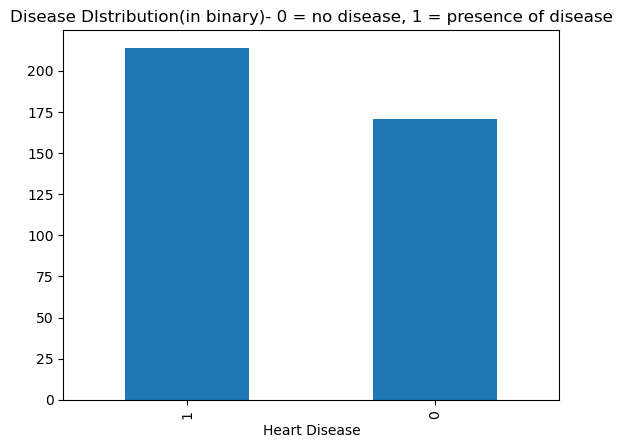

In [19]:
df['Heart Disease'].value_counts(). plot(kind= 'bar', title= 'Disease DIstribution(in binary)- 0 = no disease, 1 = presence of disease')

Inference: People with heart disease constitute a larger part of dataset

<Axes: xlabel='Heart Disease', ylabel='No. of Heart Disease Experienced By Both Genders(%)'>

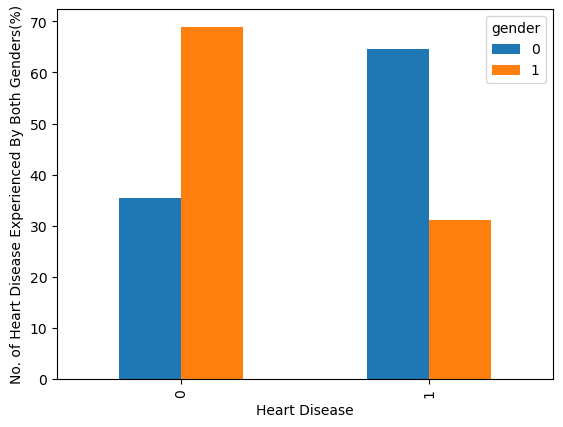

In [20]:
ch = df[['gender', 'Heart Disease']]
ch_total = ch.groupby(ch['Heart Disease'])['gender'].value_counts().unstack()
ch_percentage = ch_total / ch_total.sum() * 100
ch_percentage.plot(kind= 'bar', ylabel= 'No. of Heart Disease Experienced By Both Genders(%)')

Inference: From the data visual,
Males constitute a higher portion of those with heart disease
Females constitute a larger portion of those who do not have a heart disease 

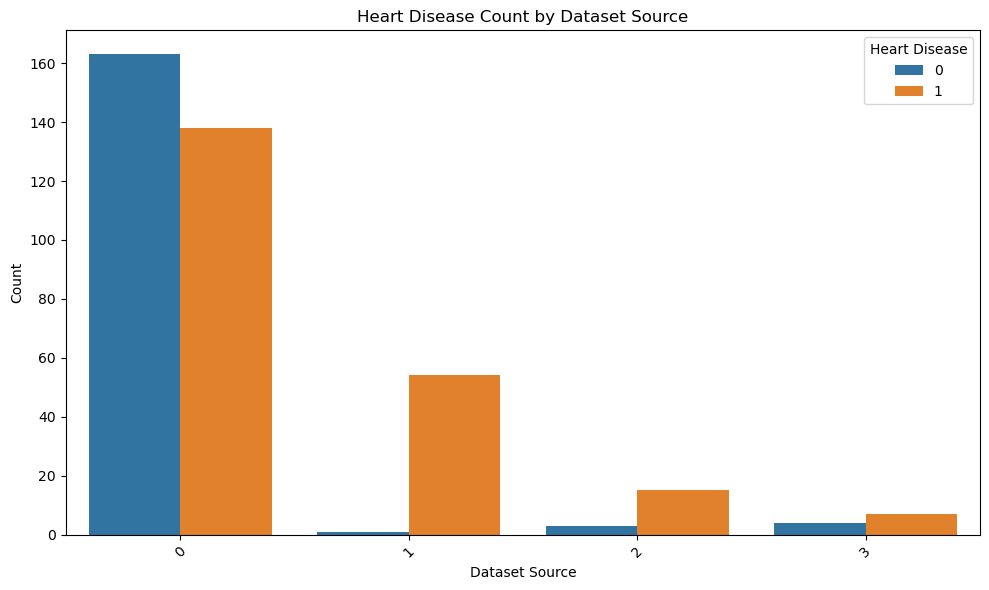

In [21]:
#plotting Heart Disease and grouped datset source
source_counts = df.groupby(['dataset_source', 'Heart Disease']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=source_counts, x='dataset_source', y='count', hue='Heart Disease')

plt.title('Heart Disease Count by Dataset Source')
plt.xlabel('Dataset Source')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Inference:
Most of the data points came from Cleveland with a slight difference between amount of people with or without a Heart Disease.

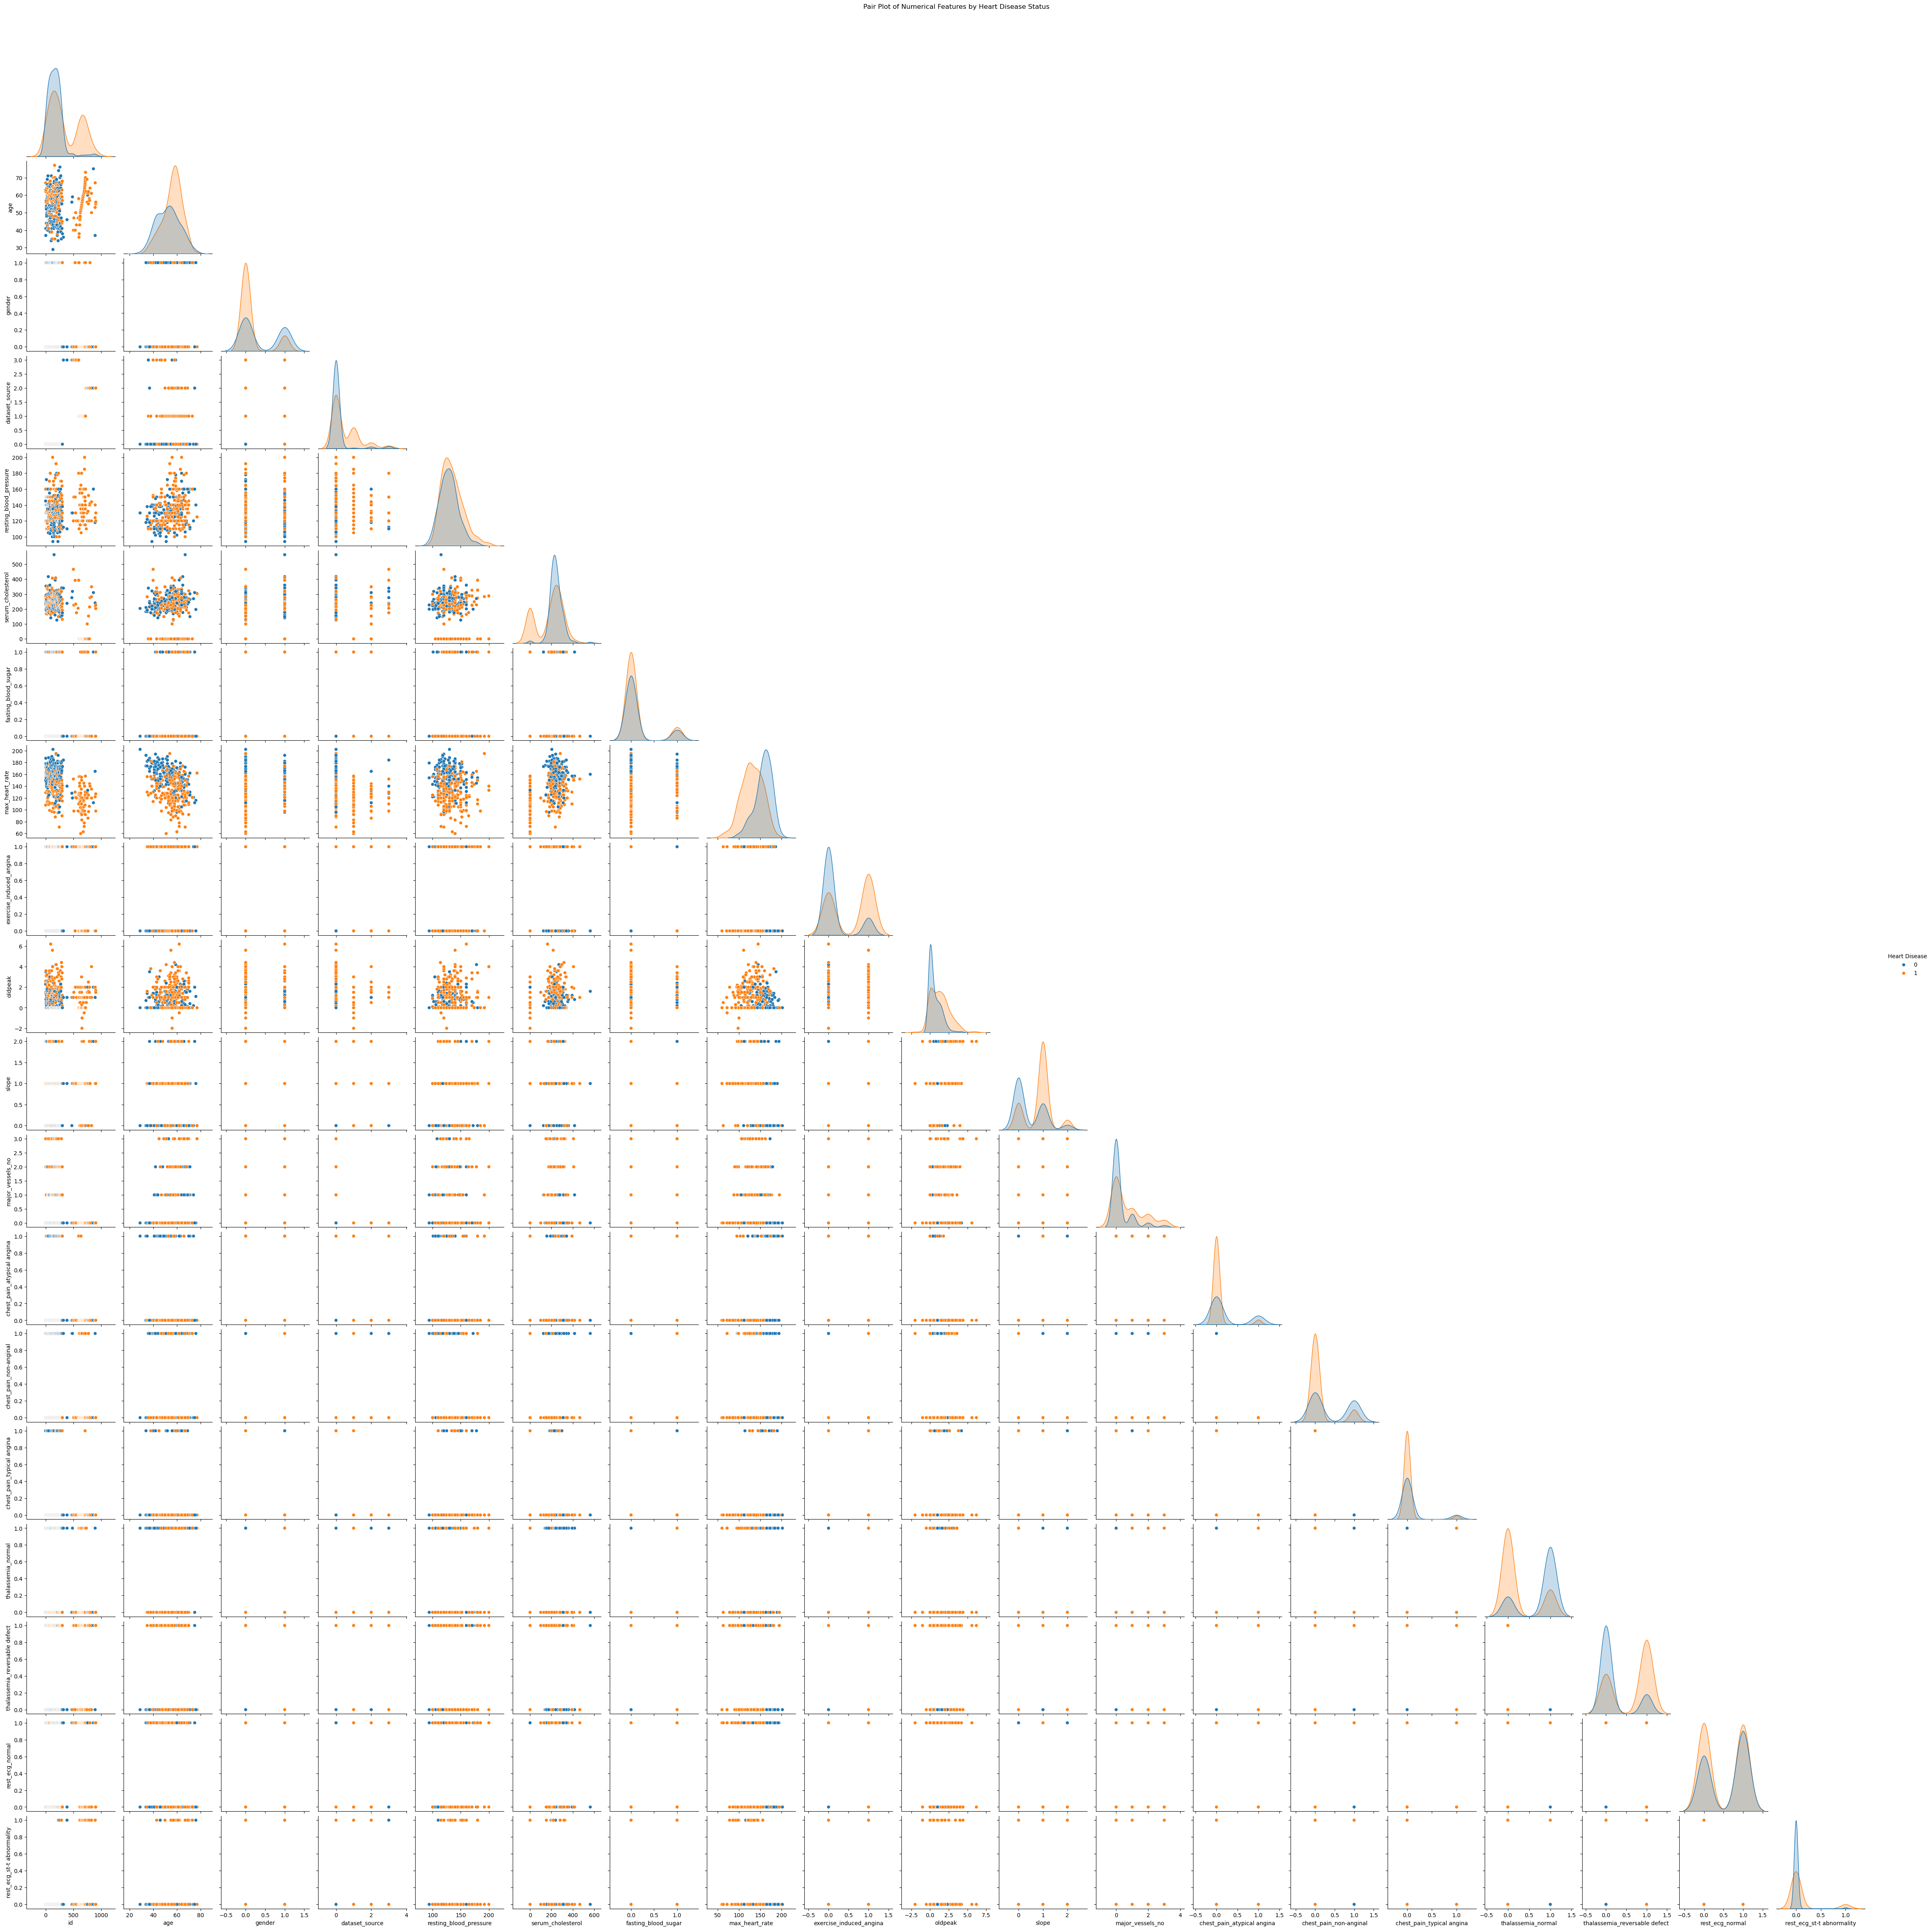

In [22]:
sns.pairplot(df , hue='Heart Disease', corner=True)
plt.suptitle("Pair Plot of Numerical Features by Heart Disease Status", y=1.02)
plt.show()

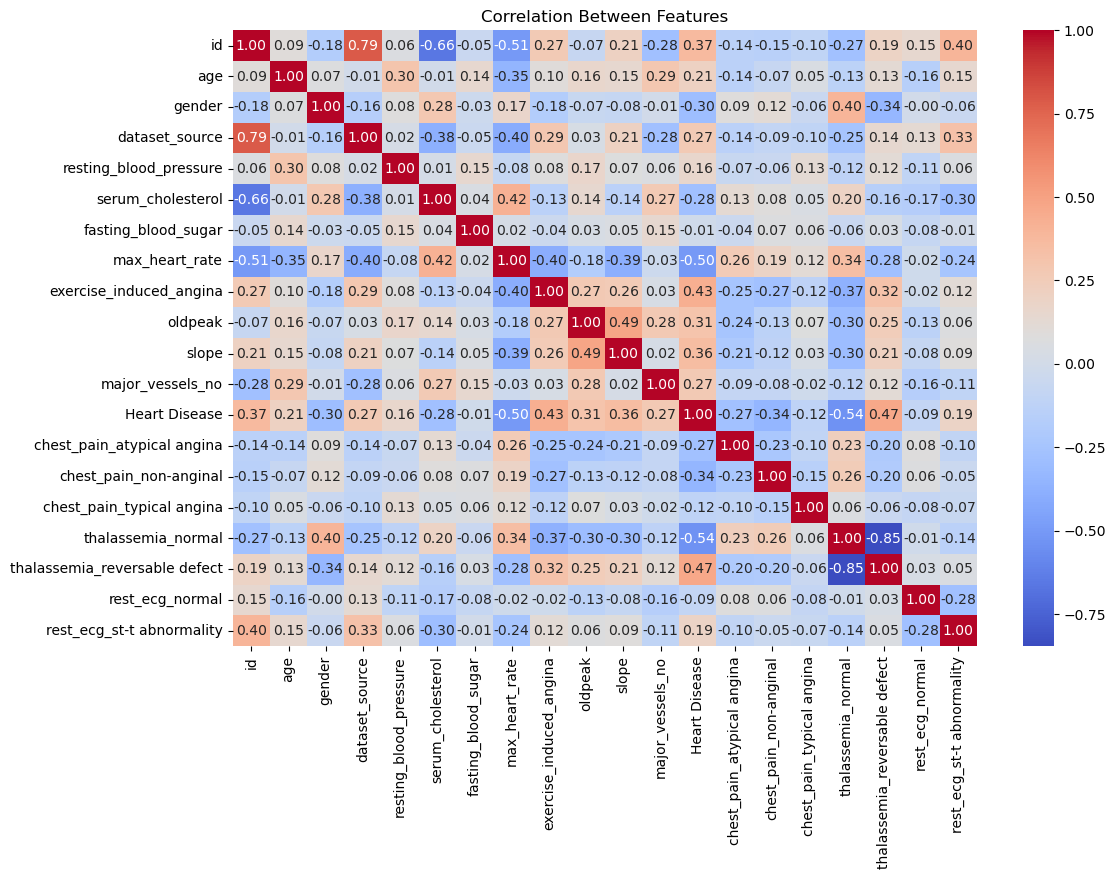

In [23]:
#We have observed how each of some columns correlated with the target variable
#Now let's observe correlation between all features in the dataset
#We want our feautures to correlate with Heart Disease so each feature must be independent of any other feauture
correlation= df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()

Inference:
1. Id and dataset_source have high correlation with each other which is a characteristic we do not want in our model(so we have to drop them)
2. gender and fasting_blood_sugar have extremely low correlations with the target variable suggesting they MIGHT not be good predictors.

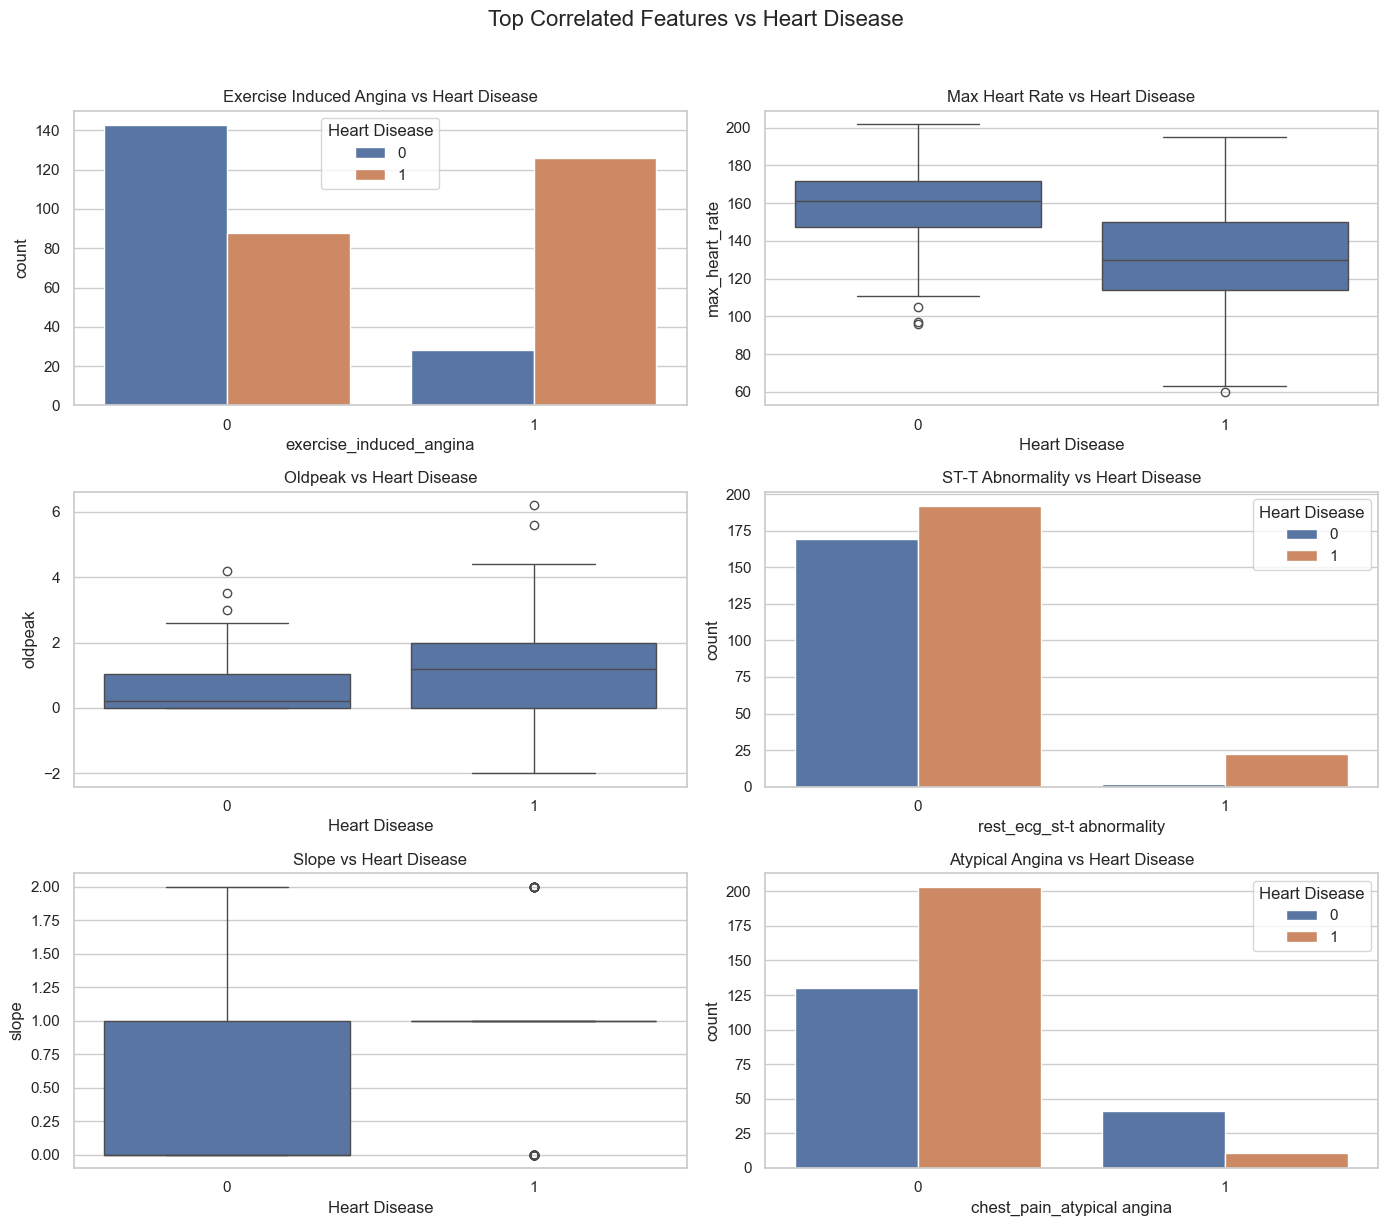

In [24]:
#PLOTTING THE IMPORTANCE FEATURES(which showed strong/moderate correlation with absolute correlation value of 0.3 and above

sns.set(style='whitegrid')
fig, axs = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle("Top Correlated Features vs Heart Disease", fontsize=16, y=1.02)

# 1. Bar plot - exercise_induced_angina
sns.countplot(data=df, x='exercise_induced_angina', hue='Heart Disease', ax=axs[0, 0])
axs[0, 0].set_title('Exercise Induced Angina vs Heart Disease')

# 2. Boxplot - max_heart_rate
sns.boxplot(data=df, x='Heart Disease', y='max_heart_rate', ax=axs[0, 1])
axs[0, 1].set_title('Max Heart Rate vs Heart Disease')

# 3. Boxplot - oldpeak
sns.boxplot(data=df, x='Heart Disease', y='oldpeak', ax=axs[1, 0])
axs[1, 0].set_title('Oldpeak vs Heart Disease')

# 4. Bar plot - rest_ecg_st-t abnormality
sns.countplot(data=df, x='rest_ecg_st-t abnormality', hue='Heart Disease', ax=axs[1, 1])
axs[1, 1].set_title('ST-T Abnormality vs Heart Disease')

# 5. Boxplot - slope (discrete but numeric)
sns.boxplot(data=df, x='Heart Disease', y='slope', ax=axs[2, 0])
axs[2, 0].set_title('Slope vs Heart Disease')

# 6. Bar plot - chest_pain_atypical angina
sns.countplot(data=df, x='chest_pain_atypical angina', hue='Heart Disease', ax=axs[2, 1])
axs[2, 1].set_title('Atypical Angina vs Heart Disease')

plt.tight_layout()
plt.show()

INFERENCE:
1. People with exercise-induced angina are more susceptible to heart disease than people without it.
2. People without chest pain( atypical angina type) have heart diseases compared to those with it(similar to no heart disease condition)
3. Overall, data is well distributed as seen in the box plots.
4. There are some outliers on the oldpeak column.
5. ST-T Abnormality hardly has aneffect as the values for the prescence & abscence of heart disease when ST-T is 0 ; is almost the same.
  

In [25]:
# Drop non-informative columns if present
df_model  = df.drop(columns=['id', 'dataset_source']) #keeping a copy df of dataset
X= df_model.drop(columns= ['Heart Disease']) #features
y= (df_model['Heart Disease'])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X , y, train_size=0.75, random_state=42)

I went for the Random Forest Classifier because it’s built on a solid idea—averaging predictions from multiple weak learners (decision trees). That gives it an edge in producing accurate results without easily overfitting.

It’s an ensemble algorithm, which simply means it builds plenty of decision trees and then uses their "votes" to decide the final output. The more trees you have, the better the predictions can generalize. So I set my n_estimators to 1000 —meaning it created 1000 trees and used their collective decision to give me a solid model performance.

That averaging and multiple decision path approach is what makes Random Forest really effective for this kind of classification task(to me).

In [27]:
#Setting model parameters and training it on train data
model = RandomForestClassifier(
    n_estimators=1000, random_state=42
)
model.fit(X_train, y_train)
#Predict
pred= model.predict(X_test)

📌 Random Forest Evaluation
Accuracy: 0.865979381443299
Precision: 0.8775510204081632
Recall: 0.86
F1 Score: 0.8686868686868687

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86        47
           1       0.88      0.86      0.87        50

    accuracy                           0.87        97
   macro avg       0.87      0.87      0.87        97
weighted avg       0.87      0.87      0.87        97



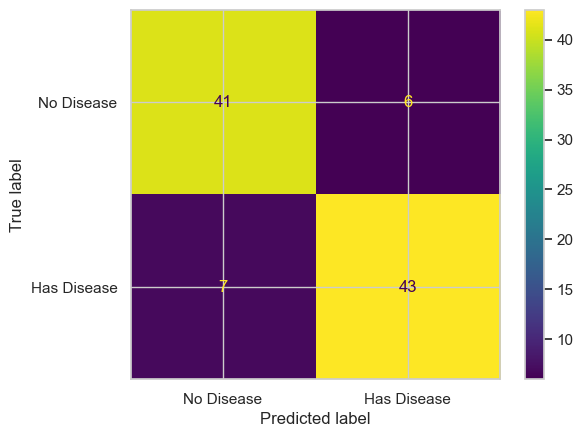

In [28]:
#Printing the result or outcome metrics of trained model
print("📌 Random Forest Evaluation")
print("Accuracy:", accuracy_score(y_test, pred))
print("Precision:", precision_score(y_test, pred))
print("Recall:", recall_score(y_test, pred))
print("F1 Score:", f1_score(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test,pred))
ConfusionMatrixDisplay.from_predictions(y_test, pred, display_labels=["No Disease", "Has Disease"])

The RandomForestClassifier model gave an accuracy of 86.6%

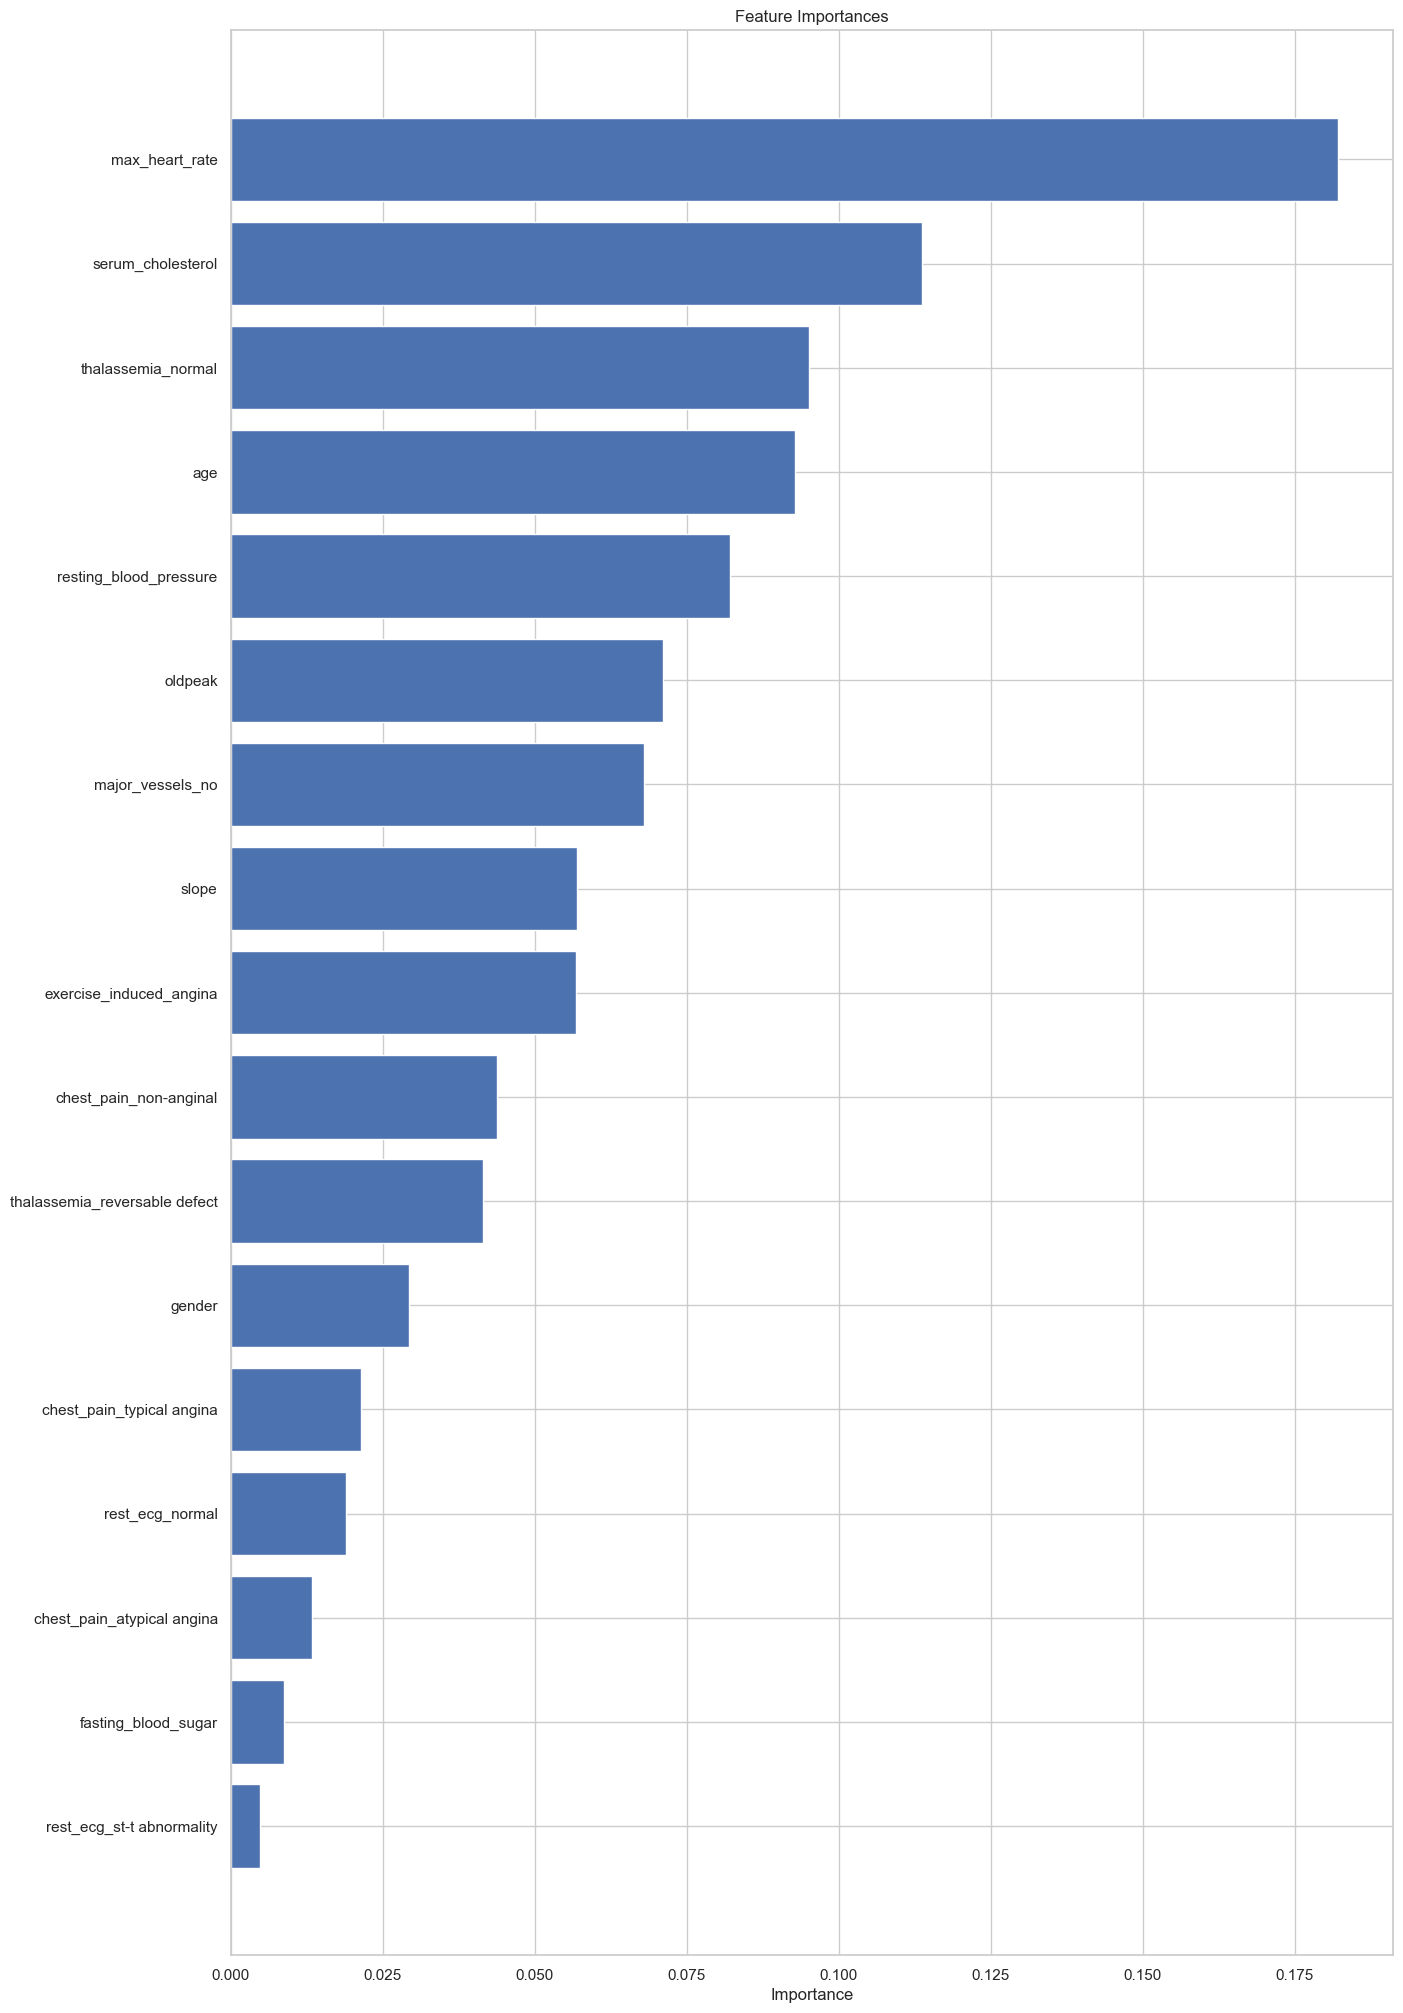

In [29]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

Eventually it is seen that some of the columns we concluded to be less useful from the top correlated feature graph are actually not useful. They are: chest_pain_atypical angina, fasting_blood_sugar andrest_ecg_st-t abnormality; they have feature importance of less than 0.025.

📌 Random Forest Evaluation
Accuracy: 0.865979381443299
Precision: 0.8775510204081632
Recall: 0.86
F1 Score: 0.8686868686868687

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86        47
           1       0.88      0.86      0.87        50

    accuracy                           0.87        97
   macro avg       0.87      0.87      0.87        97
weighted avg       0.87      0.87      0.87        97



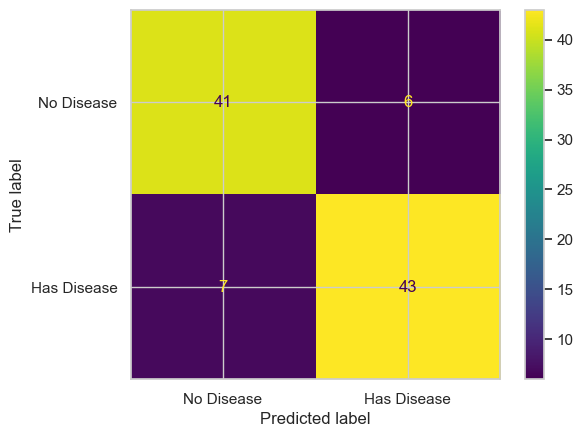

In [30]:
# feature importance < 0.05 suggests that these features contribute very little to the model’s predictive performance.
# They might be adding noise, not helping the model generalize, or simply not relevant for this specific task. So let us observe dropping them
df_m= df_model.drop(columns=['chest_pain_atypical angina', 'rest_ecg_st-t abnormality', 'fasting_blood_sugar'], inplace=True)
 

X_train, X_test, y_train, y_test = train_test_split(X , y, train_size=0.75, random_state=42)
rf_model = RandomForestClassifier(
    n_estimators=1000, random_state=42
)
rf_model.fit(X_train, y_train)
#Predict
pred= model.predict(X_test)
print("📌 Random Forest Evaluation")
print("Accuracy:", accuracy_score(y_test, pred))
print("Precision:", precision_score(y_test, pred))
print("Recall:", recall_score(y_test, pred))
print("F1 Score:", f1_score(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test,pred))
ConfusionMatrixDisplay.from_predictions(y_test, pred, display_labels=["No Disease", "Has Disease"])

Though dropping the columns had least impact, it is safer to do that to avoid misrepresentation

Accuracy: 0.845360824742268
Precision: 0.8723404255319149
Recall: 0.82
F1 Score: 0.845360824742268

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85        47
           1       0.87      0.82      0.85        50

    accuracy                           0.85        97
   macro avg       0.85      0.85      0.85        97
weighted avg       0.85      0.85      0.85        97



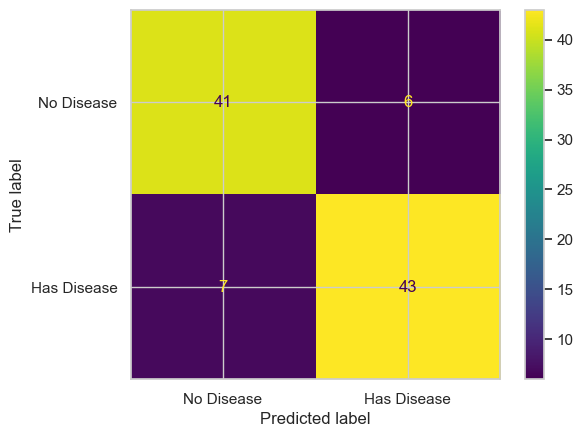

In [31]:
#USING SVM MODEL FOR COMPARISON
from sklearn.svm import SVC

# Initialize and train
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predict
svm_preds = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, svm_preds))
print("Precision:", precision_score(y_test, svm_preds))
print("Recall:", recall_score(y_test, svm_preds))
print("F1 Score:", f1_score(y_test, svm_preds))
print("\nClassification Report:\n", classification_report(y_test,svm_preds))
ConfusionMatrixDisplay.from_predictions(y_test, pred, display_labels=["No Disease", "Has Disease"])

Comparing the SVM and RandomForest Classifier, the latter did well in terms of the metrics than the former
Rf model had 86.6% accuracy
SVM model had 84.5% accuracy

In [32]:
print(list(X_train.columns))  

['age', 'gender', 'resting_blood_pressure', 'serum_cholesterol', 'fasting_blood_sugar', 'max_heart_rate', 'exercise_induced_angina', 'oldpeak', 'slope', 'major_vessels_no', 'chest_pain_atypical angina', 'chest_pain_non-anginal', 'chest_pain_typical angina', 'thalassemia_normal', 'thalassemia_reversable defect', 'rest_ecg_normal', 'rest_ecg_st-t abnormality']


## MODEL EXPLANABILITY

In [ ]:
# installing packages
!pip install shap
!pip install lime --quiet
import lime
import lime.lime_tabular

In [ ]:
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)
shap_values.shape
shap.summary_plot(shap_values, X_test)

In [ ]:
if isinstance(shap_values, list):
    # For the positive class
    shap.summary_plot(shap_values[1], X_test, feature_names=list(X_test.columns))
else:
    # If it's a 3D array
    shap.summary_plot(shap_values[:,:,1] if shap_values.ndim == 3 else shap_values,
                     X_test, feature_names=list(X_test.columns))

In [ ]:
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data = X_train.values,
    feature_names = X_train.columns,
    class_names = ['No Disease', 'Has Disease'],
    mode = 'classification'
)
i = 10  # Index of the test sample to explain

# Generate explanation
exp = explainer_lime.explain_instance(
    data_row = X_test.values[i],
    predict_fn = svm_model.predict_proba,
    num_features = 10
)

# Show explanation in notebook
exp.show_in_notebook(show_table=True)

## CONCLUSION

I cleaned the dataset thoroughly and transformed/proceesed it into one that m y model can be trained on.
It turns out there were acvtually some columns that were not necessary fro my project goal. I was able to detect and act on them as necessary.
I performed feature enginnering on some columns. Transformed unique data points in some categorical columns to dummy variables.
Then I trained my model. The best algorithm of the to I worked on was able to successfully predict 41 no heart disease correctly(6 wrongly predicted) and 43 heart diseases correctly(7 wrongly predicted). It has an overall accuracy of 86.6%, recall of 86%, precision of 87.8% and F!-score of 86.9%.
The model is a ver good one for prediction of heart disease.

In [ ]:
joblib.dump(rf_model, "rf_model.pkl")

In [ ]:
n